<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/imdb_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.text import *

In [2]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/models'),
 PosixPath('/root/.fastai/data/imdb_sample/tmp_lm.pkl'),
 PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [0]:
df = pd.read_csv(path/'texts.csv')

In [4]:
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
data_c = TextList.from_csv(path, 'texts.csv', cols = 1).split_from_df(col = 2).label_from_df(cols = 0).databunch()

In [6]:
data_c.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj xxunk",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",positive


In [7]:
data_lm=TextList.from_csv(path, 'texts.csv', cols = 1).split_by_rand_pct(0.1).label_for_lm().databunch(bs = 16)

In [8]:
data_lm.show_batch(2)

idx,text
0,"! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk ! xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is"
1,"am currently hunting for a copy to purchase . xxmaj bakshi 's work is quite true to the original work . xxmaj the visuals are xxunk and sometimes haunting . \n \n xxmaj drawbacks ? xxmaj occasionally , the movie is confusing or muddled . xxmaj there are one or two times where the storyline slows to a crawl . xxmaj but , overall -- buy this movie ."


In [0]:
data_lm.save('tmp_lm.pkl') 

In [10]:
data_lm

TextLMDataBunch;

Train: LabelList (900 items)
x: LMTextList
xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !,xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though several faces will be familiar . xxmaj the entire cast does an excellent job with the script . 
 
  xxmaj but it is hard to watch , because the

In [11]:
doc(language_model_learner)

In [0]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

In [13]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


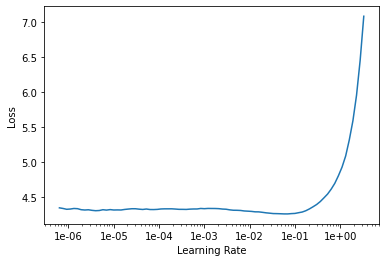

In [14]:
learn.recorder.plot()

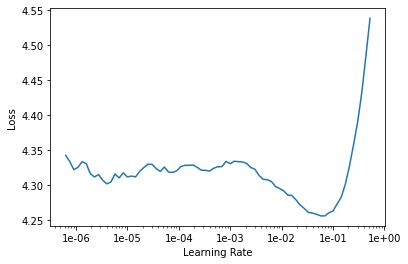

In [15]:
learn.recorder.plot(skip_end=15)

In [16]:
doc(learn.recorder.plot)

In [17]:
doc(learn.fit_one_cycle)

In [0]:
learn.save('stage-0')

In [19]:
learn.load('stage-0')
learn.fit_one_cycle(2, slice(1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,4.090985,3.789286,0.292060,00:17
1,3.587893,3.740980,0.297098,00:17


In [20]:
learn.load('stage-0')
learn.fit_one_cycle(2, slice(1e-02), moms=(0.8,0.7))
learn.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time
0,4.049895,3.787727,0.293463,00:17
1,3.579509,3.736652,0.297449,00:17


In [21]:
learn.load('stage-0')
learn.fit_one_cycle(2, slice(1e-02), moms=(0.1,0.2))

epoch,train_loss,valid_loss,accuracy,time
0,4.052111,3.782497,0.290306,00:17
1,3.585891,3.728428,0.299968,00:17


In [22]:
learn.load('stage-0')
learn.fit_one_cycle(2, slice(1e-02), moms = (0.7, 0.8))

epoch,train_loss,valid_loss,accuracy,time
0,4.066238,3.789407,0.291199,00:17
1,3.615763,3.732267,0.297449,00:17


In [0]:
learn.save('stage-1')

In [25]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


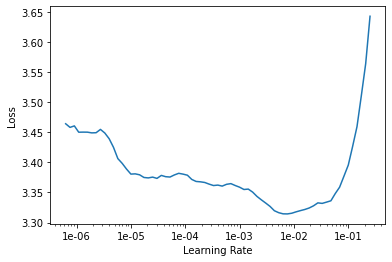

In [27]:
learn.recorder.plot(skip_end = 15)

In [29]:
learn.load('stage-1')
learn.fit_one_cycle(10, slice(1e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.357207,3.728862,0.297290,00:17
1,3.325411,3.725676,0.297991,00:17
2,3.330648,3.726327,0.298182,00:17
3,3.264096,3.730497,0.298980,00:17
4,3.211292,3.730748,0.298438,00:17
5,3.182972,3.738902,0.297991,00:17
6,3.122790,3.740220,0.298980,00:17
7,3.075662,3.744266,0.297959,00:17
8,3.105233,3.744572,0.298214,00:17
9,3.072424,3.743373,0.298980,00:17


In [0]:
learn.save('stage-2')

In [31]:
doc(learn.predict)

In [35]:
learn.predict('I hated the movie, its ', 20, temperature=1.0)

'I hated the movie, its  little background , almost everything except it . The first movie by Bug this combination is about the'

In [0]:
learn.save_encoder('lm_fine_tuned')

In [37]:
data_c = TextList.from_csv(path, 'texts.csv', cols = 1, vocab = data_lm.vocab).split_from_df(col = 2).label_from_df(cols = 0).databunch(bs = 32)

In [38]:
data_c.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the xxunk - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj xxunk",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk xxunk experience in general . xxmaj with graphics",positive


In [0]:
learn = text_classifier_learner(data_c, AWD_LSTM,  drop_mult=0.5)

In [44]:
learn.load_encoder('lm_fine_tuned')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (800 items)
x: TextList
xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !,xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though several faces will be familiar . xxmaj the entire cast does an excellent job with the script . 
 
  xxmaj but it is hard to wat

In [0]:
learn.freeze()

In [0]:
learn.save('stage-3')

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


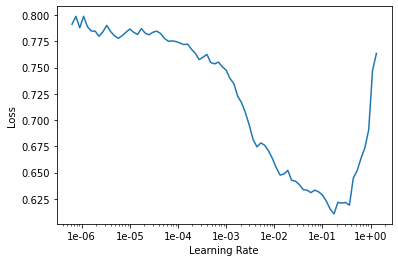

In [48]:
learn.recorder.plot()

In [50]:
learn.load('stage-3')
lrs = slice(1e-03, 1e-02)
learn.fit_one_cycle(2, slice(2e-02), moms=(0.7, 0.8))

epoch,train_loss,valid_loss,accuracy,time
0,0.577704,0.580686,0.675000,00:10
1,0.461895,0.538294,0.745000,00:10


In [0]:
learn.save('stage-4')

In [0]:
learn.load('stage-4')
learn.freeze_to(-2)
learn.save('stage-4-1')

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


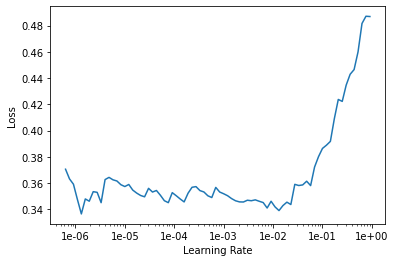

In [55]:
learn.recorder.plot()

In [57]:
learn.load('stage-4')
learn.fit_one_cycle(2, slice(2e-05, 2e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.360926,0.570504,0.755000,00:10
1,0.328451,0.545192,0.770000,00:10


In [61]:
learn.load('stage-4-1')
learn.fit_one_cycle(2, slice(2e-05, 2e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.376514,0.523268,0.755000,00:10
1,0.340796,0.516436,0.755000,00:10


In [0]:
learn.save('stage-5')

In [0]:
learn.freeze_to(-3)
learn.save('stage-5-1')

In [63]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


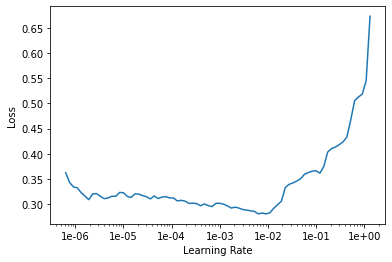

In [64]:
learn.recorder.plot()

In [73]:
learn.load('stage-5-1')
learn.fit_one_cycle(2, slice(1e-05, 2e-3), moms = (0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.313976,0.525842,0.770000,00:10
1,0.276798,0.527465,0.775000,00:10


In [0]:
learn.save('stage-6')

In [75]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


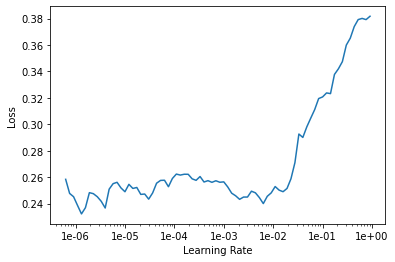

In [76]:
learn.recorder.plot()

In [0]:
learn.save('stage-6-1')

In [81]:
learn.load('stage-6-1')
learn.fit_one_cycle(2, slice(1e-03/(2.6**4), 1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.252462,0.500800,0.770000,00:10
1,0.228481,0.520017,0.765000,00:10


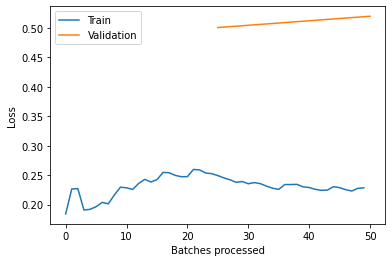

In [82]:
learn.recorder.plot_losses()